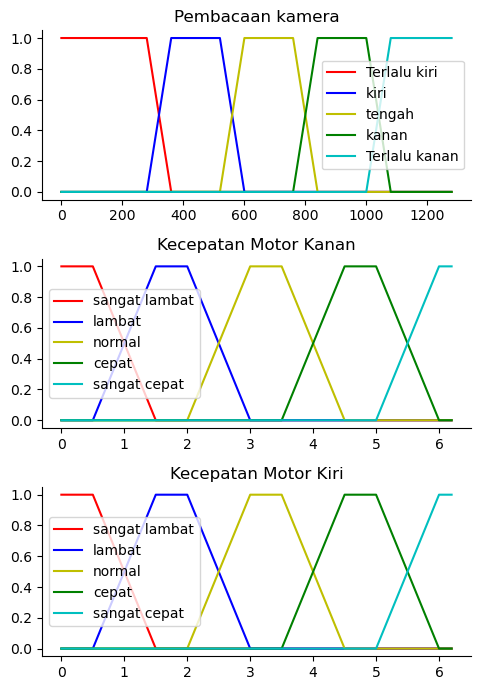

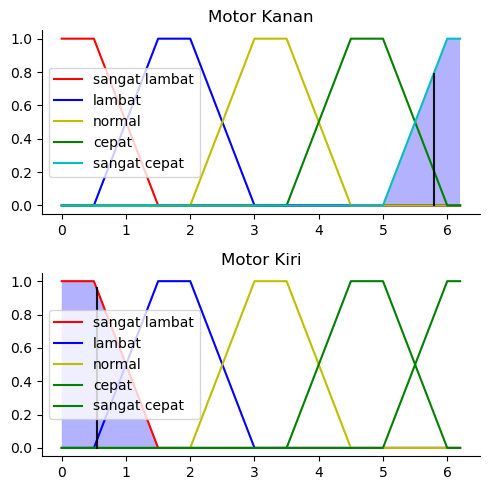

In [68]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Range sensor
x_eror = np.arange(0, 1280, 0.1)
# Range motor
x_kategori_kanan = np.arange(0, 6.28, 0.1)
x_kategori_kiri = np.arange(0, 6.28, 0.1)

# Pembacaan kamera
eror_terlalu_kiri = fuzz.trapmf(x_eror, [0, 0, 280, 360])
eror_kiri = fuzz.trapmf(x_eror, [280, 360, 520, 600])
eror_tengah = fuzz.trapmf(x_eror, [520, 600, 760, 840])
eror_kanan = fuzz.trapmf(x_eror, [760, 840, 1000, 1080])
eror_terlalu_kanan = fuzz.trapmf(x_eror, [1000, 1080, 1280, 1280])

#Kecepatan kanan 
sangat_lambat_kanan = fuzz.trapmf(x_kategori_kanan, [0, 0, 0.5, 1.5])
lambat_kanan = fuzz.trapmf(x_kategori_kanan, [0.5, 1.5, 2, 3])
normal_kanan = fuzz.trapmf(x_kategori_kanan, [2, 3, 3.5, 4.5])
cepat_kanan = fuzz.trapmf(x_kategori_kanan, [3.5, 4.5, 5, 6])
sangat_cepat_kanan = fuzz.trapmf(x_kategori_kanan, [5, 6, 6.28, 6.28])

#kecepatan Kiri
sangat_lambat_kiri = fuzz.trapmf(x_kategori_kiri, [0, 0, 0.5, 1.5])
lambat_kiri = fuzz.trapmf(x_kategori_kiri, [0.5, 1.5, 2, 3])
normal_kiri = fuzz.trapmf(x_kategori_kiri, [2, 3, 3.5, 4.5])
cepat_kiri = fuzz.trapmf(x_kategori_kiri, [3.5, 4.5, 5, 6])
sangat_cepat_kiri = fuzz.trapmf(x_kategori_kiri, [5, 6, 6.28, 6.28])

# Visualisasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(5, 7))

ax0.plot(x_eror, eror_terlalu_kiri, 'r', linewidth=1.5, label='Terlalu kiri')
ax0.plot(x_eror, eror_kiri, 'b', linewidth=1.5, label='kiri')
ax0.plot(x_eror, eror_tengah, 'y', linewidth=1.5, label='tengah')
ax0.plot(x_eror, eror_kanan, 'g', linewidth=1.5, label='kanan')
ax0.plot(x_eror, eror_terlalu_kanan, 'c', linewidth=1.5, label='Terlalu kanan')
ax0.set_title('Pembacaan kamera')
ax0.legend()

ax1.plot(x_kategori_kanan, sangat_lambat_kanan, 'r', linewidth=1.5, label='sangat lambat')
ax1.plot(x_kategori_kanan, lambat_kanan, 'b', linewidth=1.5, label='lambat')
ax1.plot(x_kategori_kanan, normal_kanan, 'y', linewidth=1.5, label='normal')
ax1.plot(x_kategori_kanan, cepat_kanan, 'g', linewidth=1.5, label='cepat')
ax1.plot(x_kategori_kanan, sangat_cepat_kanan, 'c', linewidth=1.5, label='sangat cepat')
ax1.set_title('Kecepatan Motor Kanan')
ax1.legend()

ax2.plot(x_kategori_kiri, sangat_lambat_kiri, 'r', linewidth=1.5, label='sangat lambat')
ax2.plot(x_kategori_kiri, lambat_kiri, 'b', linewidth=1.5, label='lambat')
ax2.plot(x_kategori_kiri, normal_kiri, 'y', linewidth=1.5, label='normal')
ax2.plot(x_kategori_kiri, cepat_kiri, 'g', linewidth=1.5, label='cepat')
ax2.plot(x_kategori_kiri, sangat_cepat_kiri, 'c', linewidth=1.5, label='sangat cepat')
ax2.set_title('Kecepatan Motor Kiri')
ax2.legend()

# Menonaktifkan garis atas/kanan pada plot
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

# Membership function untuk pembacaan eror kamera
pembacaan = 1200
eror_t_ki = fuzz.interp_membership(x_eror, eror_terlalu_kiri, pembacaan)
eror_ki = fuzz.interp_membership(x_eror, eror_kiri, pembacaan)
eror_tengah = fuzz.interp_membership(x_eror, eror_tengah, pembacaan)
eror_ka = fuzz.interp_membership(x_eror, eror_kanan, pembacaan)
eror_t_ka = fuzz.interp_membership(x_eror, eror_terlalu_kanan, pembacaan)

#Rules base
# rules_1 = np.fmin(eror_t_ki)
# rules_2 = np.fmin(eror_ki)
# rules_3 = np.fmin(eror_tengah)
# rules_4 = np.fmin(eror_ka)
# rules_5 = np.fmin(eror_t_ka)

# Pemggabungan motor kanan
Persentase_sangat_lambat_kanan = np.fmin(eror_t_ki, sangat_lambat_kanan)
Persentase_lambat_kanan = np.fmin(eror_ki, lambat_kanan)
Persentase_normal_kanan = np.fmin(eror_tengah, normal_kanan)
Persentase_cepat_kanan = np.fmin(eror_ka, cepat_kanan)
Persentase_sangat_cepat_kanan = np.fmin(eror_t_ka, sangat_cepat_kanan)

# Pemggabungan motor kairi
Persentase_sangat_lambat_kiri = np.fmin(eror_t_ka, sangat_lambat_kanan)
Persentase_lambat_kiri = np.fmin(eror_ka, lambat_kanan)
Persentase_normal_kiri = np.fmin(eror_tengah, normal_kanan)
Persentase_cepat_kiri = np.fmin(eror_ki, cepat_kanan)
Persentase_sangat_cepat_kiri = np.fmin(eror_t_ki, sangat_cepat_kanan)

hasil_kanan = np.zeros_like(x_kategori_kanan)
hasil_kiri = np.zeros_like(x_kategori_kiri)

# Defuzzifikasi kanan
aggregated_kanan = np.fmax(Persentase_sangat_lambat_kanan, np.fmax(Persentase_lambat_kanan, np.fmax(Persentase_normal_kanan, np.fmax(Persentase_cepat_kanan, Persentase_sangat_cepat_kanan))))
kecepatan_motor_kanan = fuzz.defuzz(x_kategori_kanan, aggregated_kanan, 'centroid')
hasil_vic_kanan = fuzz.interp_membership(x_kategori_kanan, aggregated_kanan, kecepatan_motor_kanan)

# Defuzzifikasi kiri
aggregated_kiri = np.fmax(Persentase_sangat_lambat_kiri, np.fmax(Persentase_lambat_kiri, np.fmax(Persentase_normal_kiri, np.fmax(Persentase_cepat_kiri, Persentase_sangat_cepat_kiri))))
kecepatan_motor_kiri = fuzz.defuzz(x_kategori_kiri, aggregated_kiri, 'centroid')
hasil_vic_kiri = fuzz.interp_membership(x_kategori_kiri, aggregated_kiri, kecepatan_motor_kiri)

# Visualisasi
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 5))

# Plot output motor kanan
ax1.plot(x_kategori_kanan, sangat_lambat_kanan, 'r', linewidth=1.5, label='sangat lambat')
ax1.plot(x_kategori_kanan, lambat_kanan, 'b', linewidth=1.5, label='lambat')
ax1.plot(x_kategori_kanan, normal_kanan, 'y', linewidth=1.5, label='normal')
ax1.plot(x_kategori_kanan, cepat_kanan, 'g', linewidth=1.5, label='cepat')
ax1.plot(x_kategori_kanan, sangat_cepat_kanan, 'c', linewidth=1.5, label='sangat cepat')
ax1.fill_between(x_kategori_kanan, hasil_kanan, aggregated_kanan, facecolor='b', alpha=0.3)
ax1.plot([kecepatan_motor_kanan, kecepatan_motor_kanan], [0, hasil_vic_kanan], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Motor Kanan')
ax1.legend()

# Plot output motor kiri
ax2.plot(x_kategori_kiri, sangat_lambat_kiri, 'r', linewidth=1.5, label='sangat lambat')
ax2.plot(x_kategori_kiri, lambat_kiri, 'b', linewidth=1.5, label='lambat')
ax2.plot(x_kategori_kiri, normal_kiri, 'y', linewidth=1.5, label='normal')
ax2.plot(x_kategori_kiri, cepat_kiri, 'g', linewidth=1.5, label='cepat')
ax2.plot(x_kategori_kiri, sangat_cepat_kiri, 'g', linewidth=1.5, label='sangat cepat')
ax2.fill_between(x_kategori_kiri, hasil_kiri, aggregated_kiri, facecolor='b', alpha=0.3)
ax2.plot([kecepatan_motor_kiri, kecepatan_motor_kiri], [0, hasil_vic_kiri], 'k', linewidth=1.5, alpha=0.9)
ax2.set_title('Motor Kiri')
ax2.legend()

# Matikan sumbu atas/kanan
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

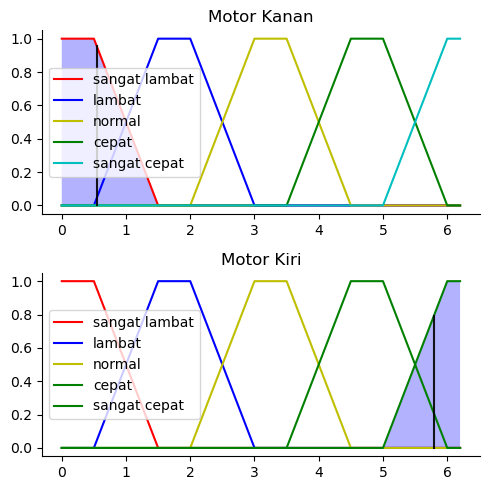

In [62]:
# Membership function untuk pembacaan eror kamera
pembacaan = 200
eror_t_ki = fuzz.interp_membership(x_eror, eror_terlalu_kiri, pembacaan)
eror_ki = fuzz.interp_membership(x_eror, eror_kiri, pembacaan)
eror_tengah = fuzz.interp_membership(x_eror, eror_tengah, pembacaan)
eror_ka = fuzz.interp_membership(x_eror, eror_kanan, pembacaan)
eror_t_ka = fuzz.interp_membership(x_eror, eror_terlalu_kanan, pembacaan)

#Rules base
# rules_1 = np.fmin(eror_t_ki)
# rules_2 = np.fmin(eror_ki)
# rules_3 = np.fmin(eror_tengah)
# rules_4 = np.fmin(eror_ka)
# rules_5 = np.fmin(eror_t_ka)

# Pemggabungan motor kanan
Persentase_sangat_lambat_kanan = np.fmin(eror_t_ki, sangat_lambat_kanan)
Persentase_lambat_kanan = np.fmin(eror_ki, lambat_kanan)
Persentase_normal_kanan = np.fmin(eror_tengah, normal_kanan)
Persentase_cepat_kanan = np.fmin(eror_ka, cepat_kanan)
Persentase_sangat_cepat_kanan = np.fmin(eror_t_ka, sangat_cepat_kanan)

# Pemggabungan motor kairi
Persentase_sangat_lambat_kiri = np.fmin(eror_t_ka, sangat_lambat_kanan)
Persentase_lambat_kiri = np.fmin(eror_ka, lambat_kanan)
Persentase_normal_kiri = np.fmin(eror_tengah, normal_kanan)
Persentase_cepat_kiri = np.fmin(eror_ki, cepat_kanan)
Persentase_sangat_cepat_kiri = np.fmin(eror_t_ki, sangat_cepat_kanan)

hasil_kanan = np.zeros_like(x_kategori_kanan)
hasil_kiri = np.zeros_like(x_kategori_kiri)

# Defuzzifikasi kanan
aggregated_kanan = np.fmax(Persentase_sangat_lambat_kanan, np.fmax(Persentase_lambat_kanan, np.fmax(Persentase_normal_kanan, np.fmax(Persentase_cepat_kanan, Persentase_sangat_cepat_kanan))))
kecepatan_motor_kanan = fuzz.defuzz(x_kategori_kanan, aggregated_kanan, 'centroid')
hasil_vic_kanan = fuzz.interp_membership(x_kategori_kanan, aggregated_kanan, kecepatan_motor_kanan)

# Defuzzifikasi kiri
aggregated_kiri = np.fmax(Persentase_sangat_lambat_kiri, np.fmax(Persentase_lambat_kiri, np.fmax(Persentase_normal_kiri, np.fmax(Persentase_cepat_kiri, Persentase_sangat_cepat_kiri))))
kecepatan_motor_kiri = fuzz.defuzz(x_kategori_kiri, aggregated_kiri, 'centroid')
hasil_vic_kiri = fuzz.interp_membership(x_kategori_kiri, aggregated_kiri, kecepatan_motor_kiri)

# Visualisasi
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 5))

# Plot output motor kanan
ax1.plot(x_kategori_kanan, sangat_lambat_kanan, 'r', linewidth=1.5, label='sangat lambat')
ax1.plot(x_kategori_kanan, lambat_kanan, 'b', linewidth=1.5, label='lambat')
ax1.plot(x_kategori_kanan, normal_kanan, 'y', linewidth=1.5, label='normal')
ax1.plot(x_kategori_kanan, cepat_kanan, 'g', linewidth=1.5, label='cepat')
ax1.plot(x_kategori_kanan, sangat_cepat_kanan, 'c', linewidth=1.5, label='sangat cepat')
ax1.fill_between(x_kategori_kanan, hasil_kanan, aggregated_kanan, facecolor='b', alpha=0.3)
ax1.plot([kecepatan_motor_kanan, kecepatan_motor_kanan], [0, hasil_vic_kanan], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Motor Kanan')
ax1.legend()

# Plot output motor kiri
ax2.plot(x_kategori_kiri, sangat_lambat_kiri, 'r', linewidth=1.5, label='sangat lambat')
ax2.plot(x_kategori_kiri, lambat_kiri, 'b', linewidth=1.5, label='lambat')
ax2.plot(x_kategori_kiri, normal_kiri, 'y', linewidth=1.5, label='normal')
ax2.plot(x_kategori_kiri, cepat_kiri, 'g', linewidth=1.5, label='cepat')
ax2.plot(x_kategori_kiri, sangat_cepat_kiri, 'g', linewidth=1.5, label='sangat cepat')
ax2.fill_between(x_kategori_kiri, hasil_kiri, aggregated_kiri, facecolor='b', alpha=0.3)
ax2.plot([kecepatan_motor_kiri, kecepatan_motor_kiri], [0, hasil_vic_kiri], 'k', linewidth=1.5, alpha=0.9)
ax2.set_title('Motor Kiri')
ax2.legend()

# Matikan sumbu atas/kanan
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [63]:
kecepatan_motor_kanan

0.5416666666666666

In [64]:
kecepatan_motor_kiri

5.79047619047619